# Problem Statement
A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers).

Leads are captured in 2 ways - Directly and Indirectly.

Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.

Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.

Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.

In [81]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [82]:
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [83]:

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, StratifiedKFold

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


In [84]:
# Read the data frame
train_data = pd.read_csv(r'C:\Users\Anupama Kandala\Desktop\train_wn75k28.csv')
test_data = pd.read_csv(r'C:\Users\Anupama Kandala\Desktop\test_Wf7sxXF.csv')

# EDA


# Checking the columns in the data

In [85]:
train_data.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

In [86]:
test_data.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12'],
      dtype='object')

# TOP 5 ROWS

In [87]:
train_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [88]:
test_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


# SHAPE OF DATA

In [89]:
train_data.shape

(39161, 19)

In [90]:
test_data.shape

(13184, 18)

# check null values of train and test 

In [91]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [92]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

products_purchased and signup_date has missing values

# Checking Duplicated Values In Train And Test Data

In [93]:
train_data[train_data.duplicated(keep= False)]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy


In [94]:
test_data[test_data.duplicated(keep= False)]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12


# Statistics of the data

In [95]:
train_data.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [96]:
test_data.describe()  

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
count,13184.000000,13184.000000,13184.000000,5048.000000,13184.000000,13184.000000,13184.000000,13184.00000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000
mean,45753.500000,7.724439,7.943416,2.108954,0.386681,0.004248,0.103307,0.00713,0.153064,0.525485,0.304460,0.142673,0.008419,0.000228,0.253413,0.000228
std,3806.037309,3.599981,2.687832,0.783483,0.505653,0.065037,0.304371,0.08414,0.360695,0.565208,0.462989,0.349969,0.092200,0.015084,0.462698,0.015084
min,39162.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42457.750000,5.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45753.500000,8.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49049.250000,10.000000,10.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52345.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.00000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


# Visualisation of Data

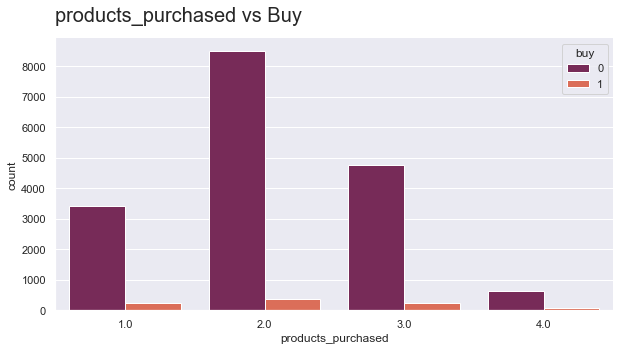

In [97]:
sns.set_style('darkgrid')#set background 

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(data=train_data, x='products_purchased', hue='buy', ax=ax, palette='rocket')
ax.set_title('products_purchased vs Buy', size=20, loc='Left', y=1.04)

sns.despine()#remove axes spines
plt.show()

# Combine both the data

In [98]:
def get_combined_data():
    train_data = pd.read_csv(r'C:\Users\Anupama Kandala\Desktop\train_wn75k28.csv')
    test_data = pd.read_csv(r'C:\Users\Anupama Kandala\Desktop\test_Wf7sxXF.csv')
    targets = train_data.buy
    train_data.drop('buy', 1, inplace=True)
    combined = train_data.append(test_data)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'id'], inplace=True, axis=1)
    return combined

In [99]:
combined = get_combined_data()
combined.describe()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
count,52345.000000,52345.000000,23298.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000
mean,6.826211,6.828198,2.144347,0.396714,0.006094,0.102952,0.010373,0.151896,0.506295,0.291107,0.166434,0.010679,0.000344,0.227624,0.000478
std,3.543873,2.711333,0.780816,0.508333,0.077828,0.303899,0.101322,0.359933,0.560053,0.457671,0.372679,0.102973,0.018541,0.439849,0.021849
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,9.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,4.000000,1.000000


In [100]:
combined.shape

(52345, 17)

# Replace the null values by combining the test and train

In [101]:
def fill_prodpurchased():
    global combined
    combined['products_purchased'].fillna(float(2.0), inplace=True)  #replacing with mean
fill_prodpurchased()

In [102]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52345 entries, 0 to 52344
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            52345 non-null  object 
 1   campaign_var_1        52345 non-null  int64  
 2   campaign_var_2        52345 non-null  int64  
 3   products_purchased    52345 non-null  float64
 4   signup_date           30583 non-null  object 
 5   user_activity_var_1   52345 non-null  int64  
 6   user_activity_var_2   52345 non-null  int64  
 7   user_activity_var_3   52345 non-null  int64  
 8   user_activity_var_4   52345 non-null  int64  
 9   user_activity_var_5   52345 non-null  int64  
 10  user_activity_var_6   52345 non-null  int64  
 11  user_activity_var_7   52345 non-null  int64  
 12  user_activity_var_8   52345 non-null  int64  
 13  user_activity_var_9   52345 non-null  int64  
 14  user_activity_var_10  52345 non-null  int64  
 15  user_activity_var_1

In [103]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52345 entries, 0 to 52344
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            52345 non-null  object 
 1   campaign_var_1        52345 non-null  int64  
 2   campaign_var_2        52345 non-null  int64  
 3   products_purchased    52345 non-null  float64
 4   signup_date           30583 non-null  object 
 5   user_activity_var_1   52345 non-null  int64  
 6   user_activity_var_2   52345 non-null  int64  
 7   user_activity_var_3   52345 non-null  int64  
 8   user_activity_var_4   52345 non-null  int64  
 9   user_activity_var_5   52345 non-null  int64  
 10  user_activity_var_6   52345 non-null  int64  
 11  user_activity_var_7   52345 non-null  int64  
 12  user_activity_var_8   52345 non-null  int64  
 13  user_activity_var_9   52345 non-null  int64  
 14  user_activity_var_10  52345 non-null  int64  
 15  user_activity_var_1

In [104]:
combined.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0
1,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0
2,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,4,6,2.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0


In [105]:
combined.shape

(52345, 17)

In [106]:
train=combined[:39161]
test=combined[39161:]
targets=train_data.buy

In [107]:
train=train.drop(['created_at','signup_date'],axis=1)

In [108]:
train.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,6,2.0,0,0,0,0,0,0,1,0,0,0,1,0


In [109]:
test=test.drop('created_at',axis=1)

In [110]:
test=test.drop('signup_date', axis=1)

In [111]:
def cross_val_score(train,targets,model,params, folds=9): 
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    
    for fold, (train_temp,test_temp) in enumerate(skf.split(train,targets)):
        
        x_train,y_train = train.iloc[train_temp], targets.iloc[train_temp]
    
        x_test,y_test = train.iloc[test_temp],targets.iloc[test_temp]
    
    
        models=model(**params)
        models.fit(x_train,y_train,
                  eval_set=[(x_test, y_test)],
                  early_stopping_rounds=100,
                  verbose=400)
    
        pred = models.predict_proba(x_test)[:, 1]
        roc = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc}")
        print("-"*50)
        
    return models

In [112]:
lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

In [113]:
result_lgb = cross_val_score(train,targets,LGBMClassifier,lgb_params)

[400]	valid_0's binary_logloss: 0.103984
roc_auc_score: 0.8949048927862487
--------------------------------------------------
[400]	valid_0's binary_logloss: 0.0908086
roc_auc_score: 0.9344943611892764
--------------------------------------------------
[400]	valid_0's binary_logloss: 0.0982923
roc_auc_score: 0.9042070042917706
--------------------------------------------------
[400]	valid_0's binary_logloss: 0.089902
roc_auc_score: 0.9265855223108797
--------------------------------------------------
[400]	valid_0's binary_logloss: 0.0934042
roc_auc_score: 0.9263995164939705
--------------------------------------------------
[400]	valid_0's binary_logloss: 0.0916774
roc_auc_score: 0.9346388650699622
--------------------------------------------------
[400]	valid_0's binary_logloss: 0.0918632
roc_auc_score: 0.9324444328077168
--------------------------------------------------
[400]	valid_0's binary_logloss: 0.10594
roc_auc_score: 0.900934720140339
----------------------------------------

In [114]:
cat_params= {'n_estimators': 20000, 
                  'depth': 4, 
                  'learning_rate': 0.023, 
                  'colsample_bylevel': 0.655, 
                  'bagging_temperature': 0.921, 
                  'l2_leaf_reg': 10.133}

In [115]:
result_cat_boost=cross_val_score(train,targets,CatBoostClassifier,cat_params)

0:	learn: 0.6563245	test: 0.6563698	best: 0.6563698 (0)	total: 6.38ms	remaining: 2m 7s
400:	learn: 0.0926503	test: 0.1025176	best: 0.1025176 (400)	total: 2.11s	remaining: 1m 43s
800:	learn: 0.0897017	test: 0.1016615	best: 0.1016375 (765)	total: 4.59s	remaining: 1m 50s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1016053564
bestIteration = 908

Shrink model to first 909 iterations.
roc_auc_score: 0.900920533123923
--------------------------------------------------
0:	learn: 0.6563952	test: 0.6563330	best: 0.6563330 (0)	total: 5.33ms	remaining: 1m 46s
400:	learn: 0.0943240	test: 0.0900000	best: 0.0900000 (400)	total: 2.09s	remaining: 1m 42s
800:	learn: 0.0914312	test: 0.0883465	best: 0.0883465 (800)	total: 4.34s	remaining: 1m 44s
1200:	learn: 0.0901780	test: 0.0879812	best: 0.0879812 (1200)	total: 6.18s	remaining: 1m 36s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.08792074065
bestIteration = 1266

Shrink model to first 1267 iterations.
roc

In [116]:
xgb_params= {'n_estimators': 20000, 
             'max_depth': 6, 
             'learning_rate': 0.0201, 
             'reg_lambda': 29.326, 
             'subsample': 0.818, 
             'colsample_bytree': 0.235, 
             'colsample_bynode': 0.820, 
             'colsample_bylevel': 0.453}

In [117]:
result_xgb = cross_val_score(train,targets,XGBClassifier,xgb_params)

[0]	validation_0-logloss:0.67664
[400]	validation_0-logloss:0.12994
[800]	validation_0-logloss:0.11246
[1200]	validation_0-logloss:0.10751
[1600]	validation_0-logloss:0.10546
[2000]	validation_0-logloss:0.10434
[2400]	validation_0-logloss:0.10381
[2800]	validation_0-logloss:0.10351
[3200]	validation_0-logloss:0.10325
[3600]	validation_0-logloss:0.10304
[4000]	validation_0-logloss:0.10295
[4400]	validation_0-logloss:0.10275
[4800]	validation_0-logloss:0.10263
[5200]	validation_0-logloss:0.10253
[5509]	validation_0-logloss:0.10248
roc_auc_score: 0.8981109438736558
--------------------------------------------------
[0]	validation_0-logloss:0.67663
[400]	validation_0-logloss:0.12413
[800]	validation_0-logloss:0.10318
[1200]	validation_0-logloss:0.09690
[1600]	validation_0-logloss:0.09419
[2000]	validation_0-logloss:0.09257
[2400]	validation_0-logloss:0.09168
[2800]	validation_0-logloss:0.09120
[3200]	validation_0-logloss:0.09081
[3600]	validation_0-logloss:0.09051
[4000]	validation_0-loglo

In [118]:
pred_test_lgb = result_lgb.predict_proba(test)[:,1]
pred_test_xgb = result_xgb.predict_proba(test)[:,1]
pred_test_cat = result_cat_boost.predict_proba(test)[:,1]
prediction = ((pred_test_lgb + pred_test_cat+pred_test_xgb)/3)
prediction=np.round_(prediction, decimals = 0, out = None)
print(type(prediction))
#prediction = prediction.tolist()

<class 'numpy.ndarray'>


In [119]:
output = prediction
df_output = pd.DataFrame()
temp = pd.read_csv(r'C:\Users\Anupama Kandala\Desktop\test_Wf7sxXF.csv')
df_output['id'] = temp['id']
df_output['buy'] = output

In [120]:
print(df_output)

          id  buy
0      39162  1.0
1      39163  0.0
2      39164  0.0
3      39165  1.0
4      39166  0.0
...      ...  ...
13179  52341  0.0
13180  52342  0.0
13181  52343  0.0
13182  52344  0.0
13183  52345  0.0

[13184 rows x 2 columns]


In [121]:
df_output['buy'].value_counts()

0.0    12865
1.0      319
Name: buy, dtype: int64

In [123]:
df_output.to_csv(r'C:\Users\Anupama Kandala\Desktop\output\output1_cxl.csv',index=False)